In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('Flipkart.csv')
df.head()

,Brand,Model,Color,Storage,Ram,Screen_Resolution,Battery,Rating,Price,Main Camera,Front Camera
0,SAMSUNG,Galaxy Z Flip6 5G,Mint,512.0,12.0,6.7,4000.0,4.4,"₹1,21,999",50MP + 12MP,10MP
1,SAMSUNG,Galaxy A16 5G,Gold,128.0,8.0,6.7,4700.0,4.5,"₹17,976",50MP + 12MP,10MP
2,Apple,iPhone 15,Black,128.0,NaN,6.1,NaN,4.6,"₹57,749",48MP + 12MP,12MP
3,Apple,iPhone 15,Pink,128.0,NaN,6.1,NaN,4.6,"₹57,749",48MP + 12MP,12MP
4,Apple,iPhone 15,Green,128.0,NaN,6.1,NaN,4.6,"₹57,749",48MP + 12MP,12MP


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              984 non-null    object 
 1   Model              794 non-null    object 
 2   Color              858 non-null    object 
 3   Storage            853 non-null    float64
 4   Ram                759 non-null    float64
 5   Screen_Resolution  971 non-null    float64
 6   Battery            924 non-null    float64
 7   Rating             979 non-null    float64
 8   Price              984 non-null    object 
 9   Main Camera        767 non-null    object 
 10  Front Camera       772 non-null    object 
dtypes: float64(5), object(6)
memory usage: 84.7+ KB


In [14]:
df['Price'] = df['Price'].replace({'₹': '', ',': ''}, regex=True).astype(int)

In [16]:
# Replace null values in Ram with mean value
df['Ram'] = df['Ram'].fillna(df['Ram'].mode()[0]).astype(int)

In [18]:
# Replace null values in Storage with mean value
df['Storage'] = df['Storage'].fillna(df['Storage'].mean())
df['Storage']=df['Storage'].astype(int)

In [20]:
# Replace null values in Screen_Resolution with mean value
df['Screen_Resolution'] = df['Screen_Resolution'].fillna(df['Screen_Resolution'].mean())

In [22]:
# Replace null values in  Front Camera with mode value
df['Front Camera'] = df['Front Camera'].fillna(df['Front Camera'].mode()[0])

In [24]:
# Replace null values in Main Camera with mode value
df['Main Camera'] = df['Main Camera'].fillna(df['Main Camera'].mode()[0])

In [26]:
# Replace null values in Battery with mean value
df['Battery'] = df['Battery'].fillna(df['Battery'].mean()).astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              984 non-null    object 
 1   Model              794 non-null    object 
 2   Color              858 non-null    object 
 3   Storage            984 non-null    int32  
 4   Ram                984 non-null    int32  
 5   Screen_Resolution  984 non-null    float64
 6   Battery            984 non-null    int32  
 7   Rating             979 non-null    float64
 8   Price              984 non-null    int32  
 9   Main Camera        984 non-null    object 
 10  Front Camera       984 non-null    object 
dtypes: float64(2), int32(4), object(5)
memory usage: 69.3+ KB


In [30]:
df=df.dropna()
df.reset_index(drop=True, inplace=True)
df

,Brand,Model,Color,Storage,Ram,Screen_Resolution,Battery,Rating,Price,Main Camera,Front Camera
0,SAMSUNG,Galaxy Z Flip6 5G,Mint,512,12,6.70,4000,4.4,121999,50MP + 12MP,10MP
1,SAMSUNG,Galaxy A16 5G,Gold,128,8,6.70,4700,4.5,17976,50MP + 12MP,10MP
2,Apple,iPhone 15,Black,128,8,6.10,4227,4.6,57749,48MP + 12MP,12MP
3,Apple,iPhone 15,Pink,128,8,6.10,4227,4.6,57749,48MP + 12MP,12MP
4,Apple,iPhone 15,Green,128,8,6.10,4227,4.6,57749,48MP + 12MP,12MP
...,...,...,...,...,...,...,...,...,...,...,...
789,OPPO,A3 Pro 5G,Starry Black,256,8,1.30,400,4.3,19999,50MP + 12MP,10MP
790,Apple,iPhone 14 Plus,Blue,128,8,6.58,5000,4.6,56999,50MP + 2MP,8MP
791,Tecno,Spark 20 Pro 5G,Glossy White,128,8,6.67,5000,4.1,15999,50MP + 12MP,10MP
792,vivo,V40 Pro 5G,Ganges Blue,512,8,6.78,5000,4.5,55999,50MP + 12MP,10MP


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              794 non-null    object 
 1   Model              794 non-null    object 
 2   Color              794 non-null    object 
 3   Storage            794 non-null    int32  
 4   Ram                794 non-null    int32  
 5   Screen_Resolution  794 non-null    float64
 6   Battery            794 non-null    int32  
 7   Rating             794 non-null    float64
 8   Price              794 non-null    int32  
 9   Main Camera        794 non-null    object 
 10  Front Camera       794 non-null    object 
dtypes: float64(2), int32(4), object(5)
memory usage: 56.0+ KB


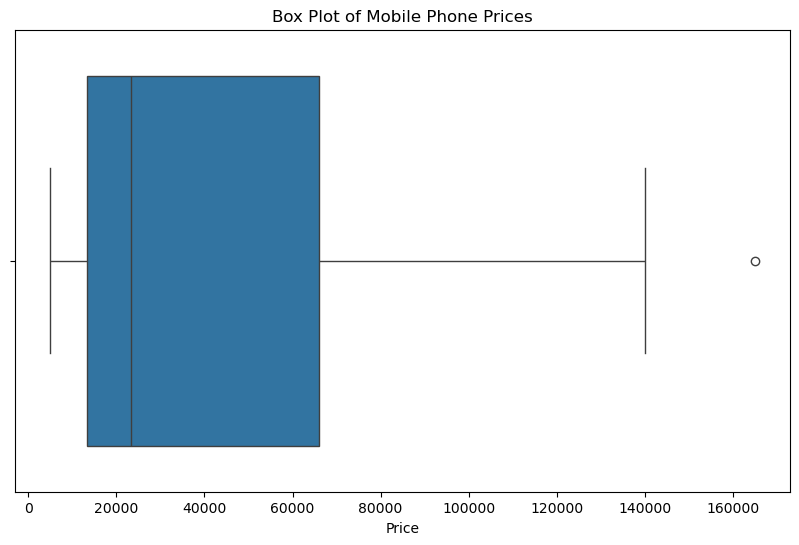

In [34]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Price')
plt.title('Box Plot of Mobile Phone Prices')
plt.xlabel('Price')
plt.show()

In [35]:
df.describe()

,Storage,Ram,Screen_Resolution,Battery,Rating,Price
count,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
mean,226.129723,8.496222,6.055160,4315.690176,4.370025,42751.021411
std,134.567879,2.818711,1.538478,1298.924147,0.158040,40079.754586
min,32.000000,3.000000,0.660000,400.000000,3.500000,4969.000000
25%,128.000000,8.000000,6.560000,4000.000000,4.300000,13452.500000
50%,256.000000,8.000000,6.700000,5000.000000,4.400000,23244.500000
75%,256.000000,8.000000,6.700000,5000.000000,4.500000,65999.000000
max,512.000000,32.000000,6.900000,6000.000000,5.000000,164900.000000


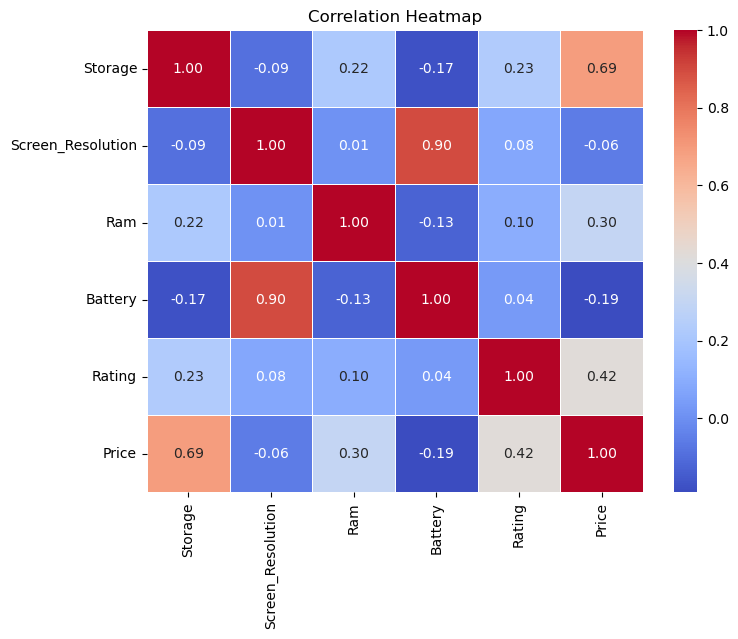

In [39]:
numerical_features = ['Storage', 'Screen_Resolution','Ram', 'Battery', 'Rating','Price']
numerical_data = df[numerical_features]
corr = numerical_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True, cmap="coolwarm",fmt='.2f',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

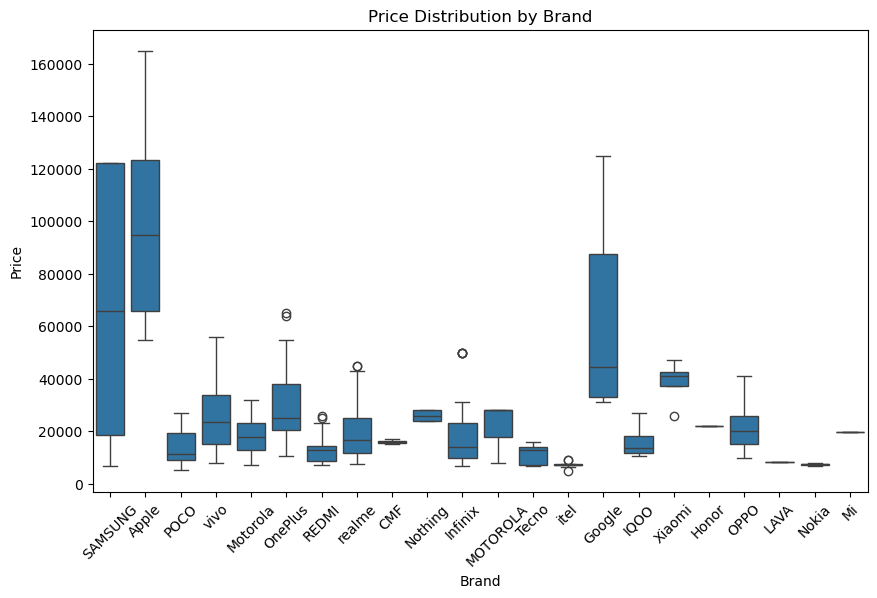

In [42]:
# Box plot for Brand vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Brand', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution by Brand')
plt.show()

In [45]:
# Identify top 10 categories for 'Brand', 'Model', and 'Color'
top_brands = df['Brand'].value_counts().head(10).index
top_models = df['Model'].value_counts().head(10).index
top_colors = df['Color'].value_counts().head(10).index

# Filter dataset for only top categories
df_top_brands = df[df['Brand'].isin(top_brands)]
df_top_models = df[df['Model'].isin(top_models)]
df_top_colors = df[df['Color'].isin(top_colors)]


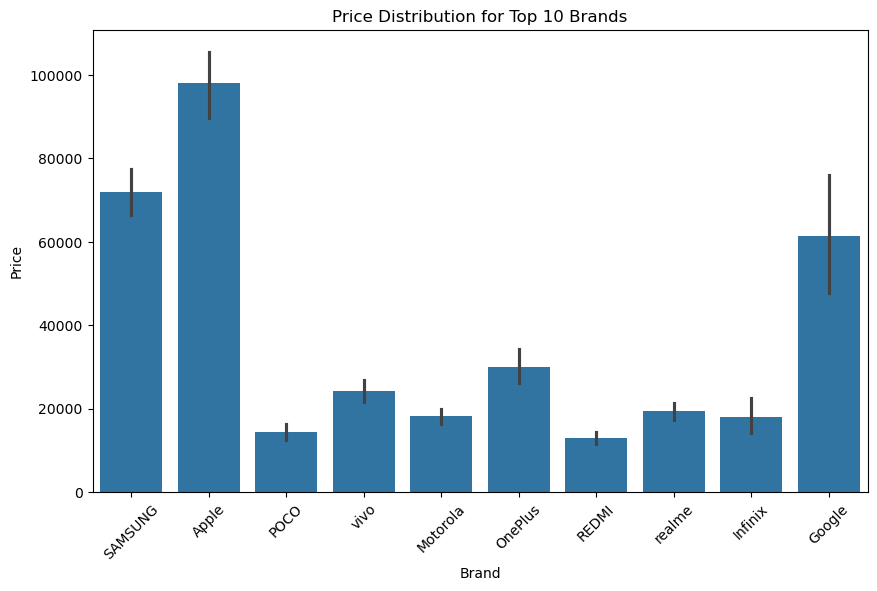

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='Price', data=df_top_brands)
plt.xticks(rotation=45)
plt.title('Price Distribution for Top 10 Brands')
plt.show()

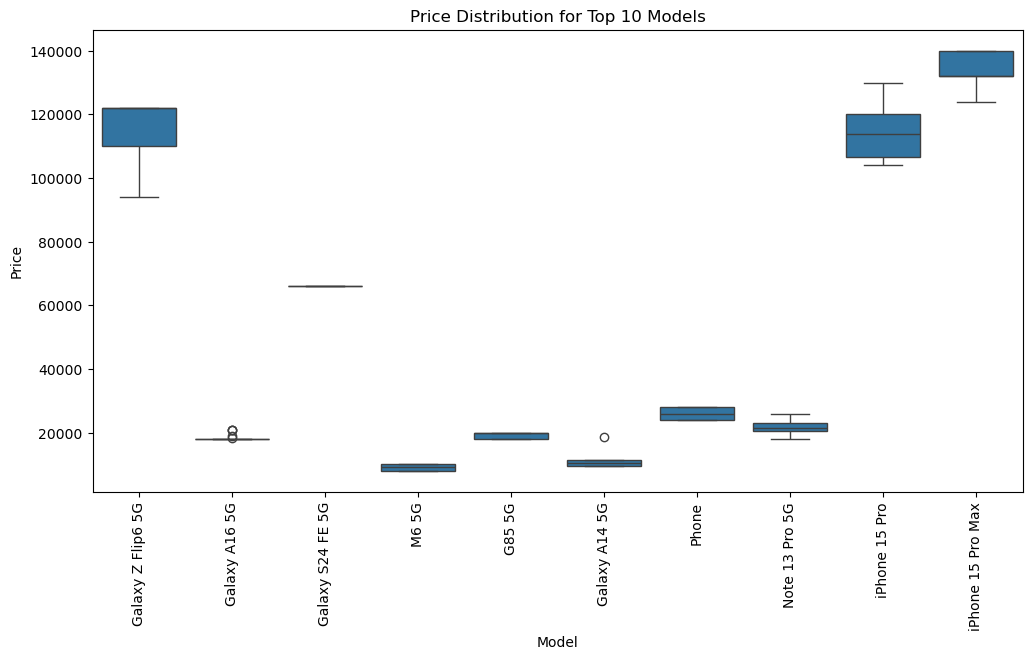

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Price', data=df_top_models)
plt.xticks(rotation=90)
plt.title('Price Distribution for Top 10 Models')
plt.show()


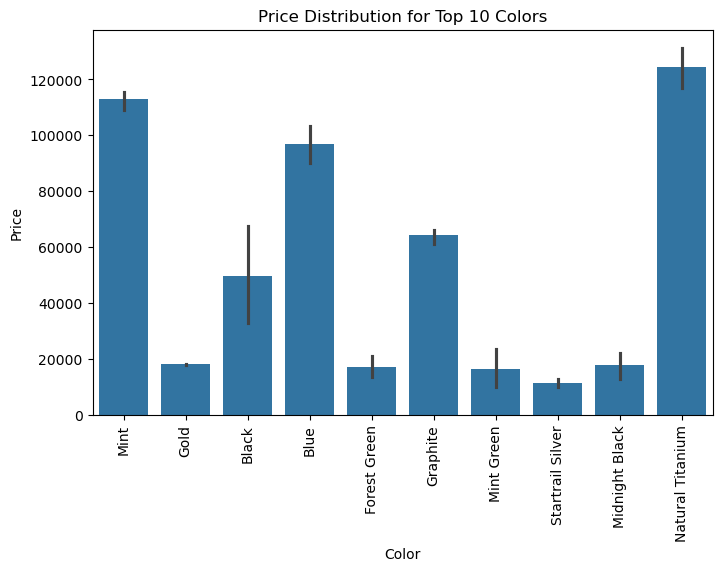

In [62]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Color', y='Price', data=df_top_colors)
plt.xticks(rotation=90)
plt.title('Price Distribution for Top 10 Colors')
plt.show()


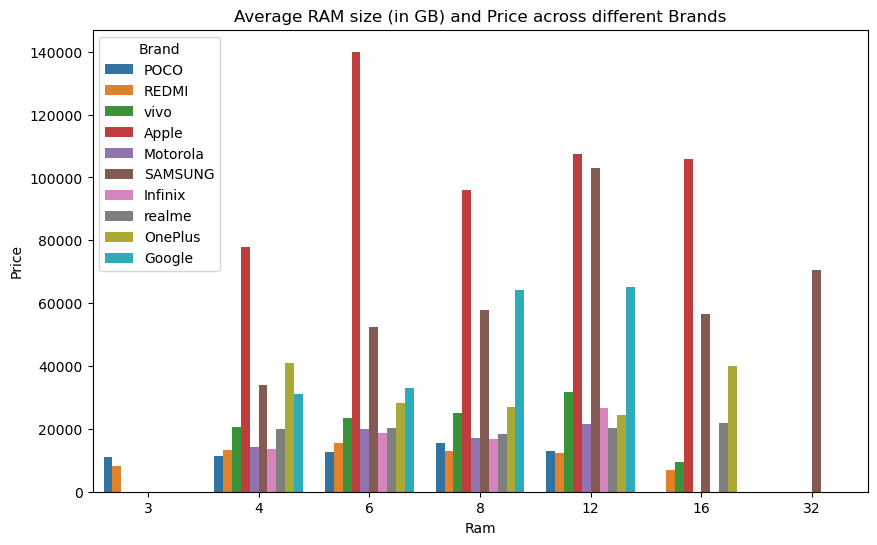

In [80]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Ram', y='Price',hue= "Brand", data=df_top_brands, estimator='mean', errorbar=None)
plt.title('Average RAM size (in GB) and Price across different Brands')
plt.show()

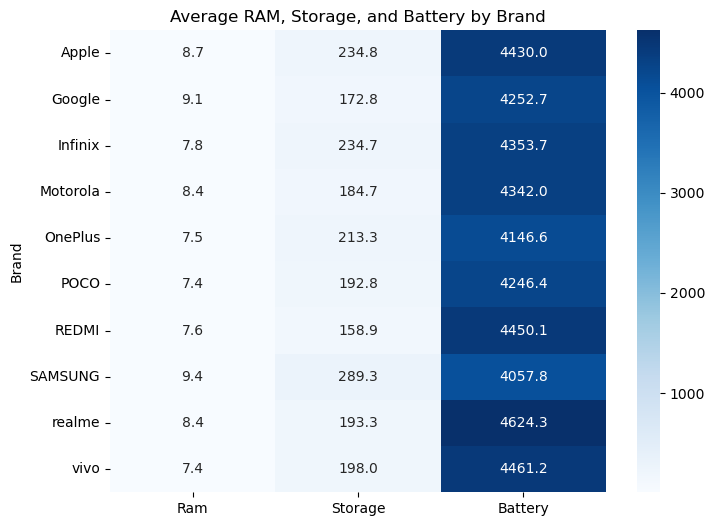

In [163]:
grouped = df_top_brands.groupby('Brand')[['Ram', 'Storage', 'Battery']].mean()

plt.figure(figsize=(8, 6))
sns.heatmap(grouped, annot=True, cmap='Blues', fmt=".1f")
plt.title('Average RAM, Storage, and Battery by Brand')
plt.show()


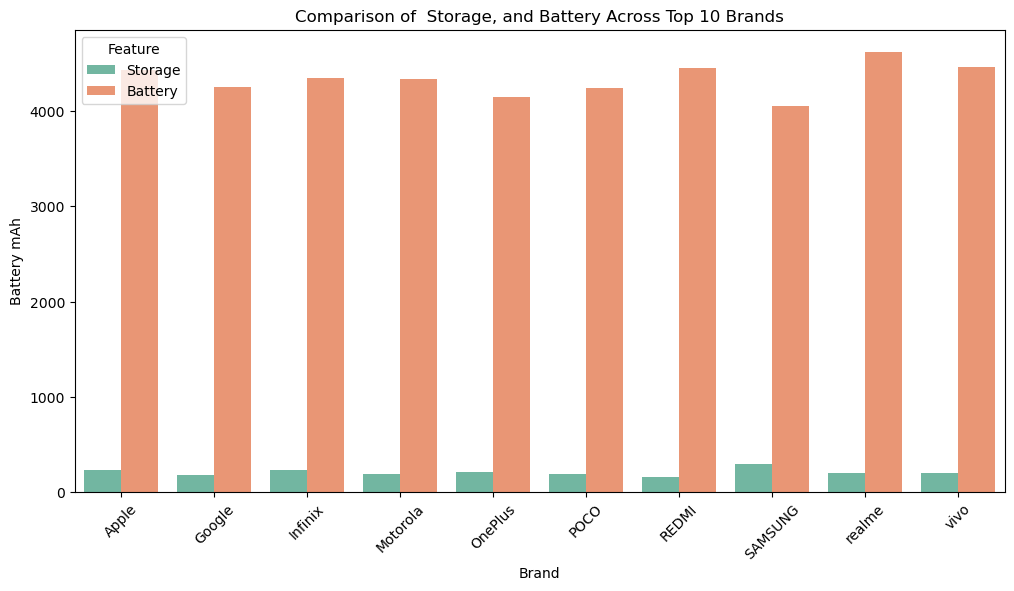

In [90]:
# Reshape the data for grouped bar plot
grouped_data = df_top_brands.groupby('Brand')[['Storage', 'Battery']].mean().reset_index()
melted_data = grouped_data.melt(id_vars='Brand', value_vars=['Storage', 'Battery'], 
                                 var_name='Feature', value_name='Value')
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Brand', y='Value', hue='Feature', data=melted_data, palette='Set2')
plt.title('Comparison of  Storage, and Battery Across Top 10 Brands')
plt.xticks(rotation=45)
plt.ylabel('Battery mAh')
plt.xlabel('Brand')
plt.legend(title='Feature')
plt.show()
